## ML LAB ASSIGNMENT 

### SUPRATIM NAG -- CSE-AIML/22/057 -- GROUP-B

###  Q-7:Write a python code to implement SVM algorithm on iris dataset. Show the classification results.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv(r"C:\Users\SUPRATIM NAG\OneDrive\Documents\ML\Personal_Datasets\Dataset.csv")

In [18]:
data.shape

(100, 11)

In [19]:
data.head(1)

Patient ID  Age  Blood Pressure  Cholesterol Levels  Heart Rate   BMI  \
0         101   65             130                 250          72  28.0   

                             Diagnosis  \
0  Hypertension with high cholesterol.   

                                      Treatment Plan  Recovery Status  \
0  Medication: Lisinopril (blood pressure), Stati...  Active Recovery   

        Medication Type Follow-up Requirement  
0  Lisinopril, Statins.            Quarterly.

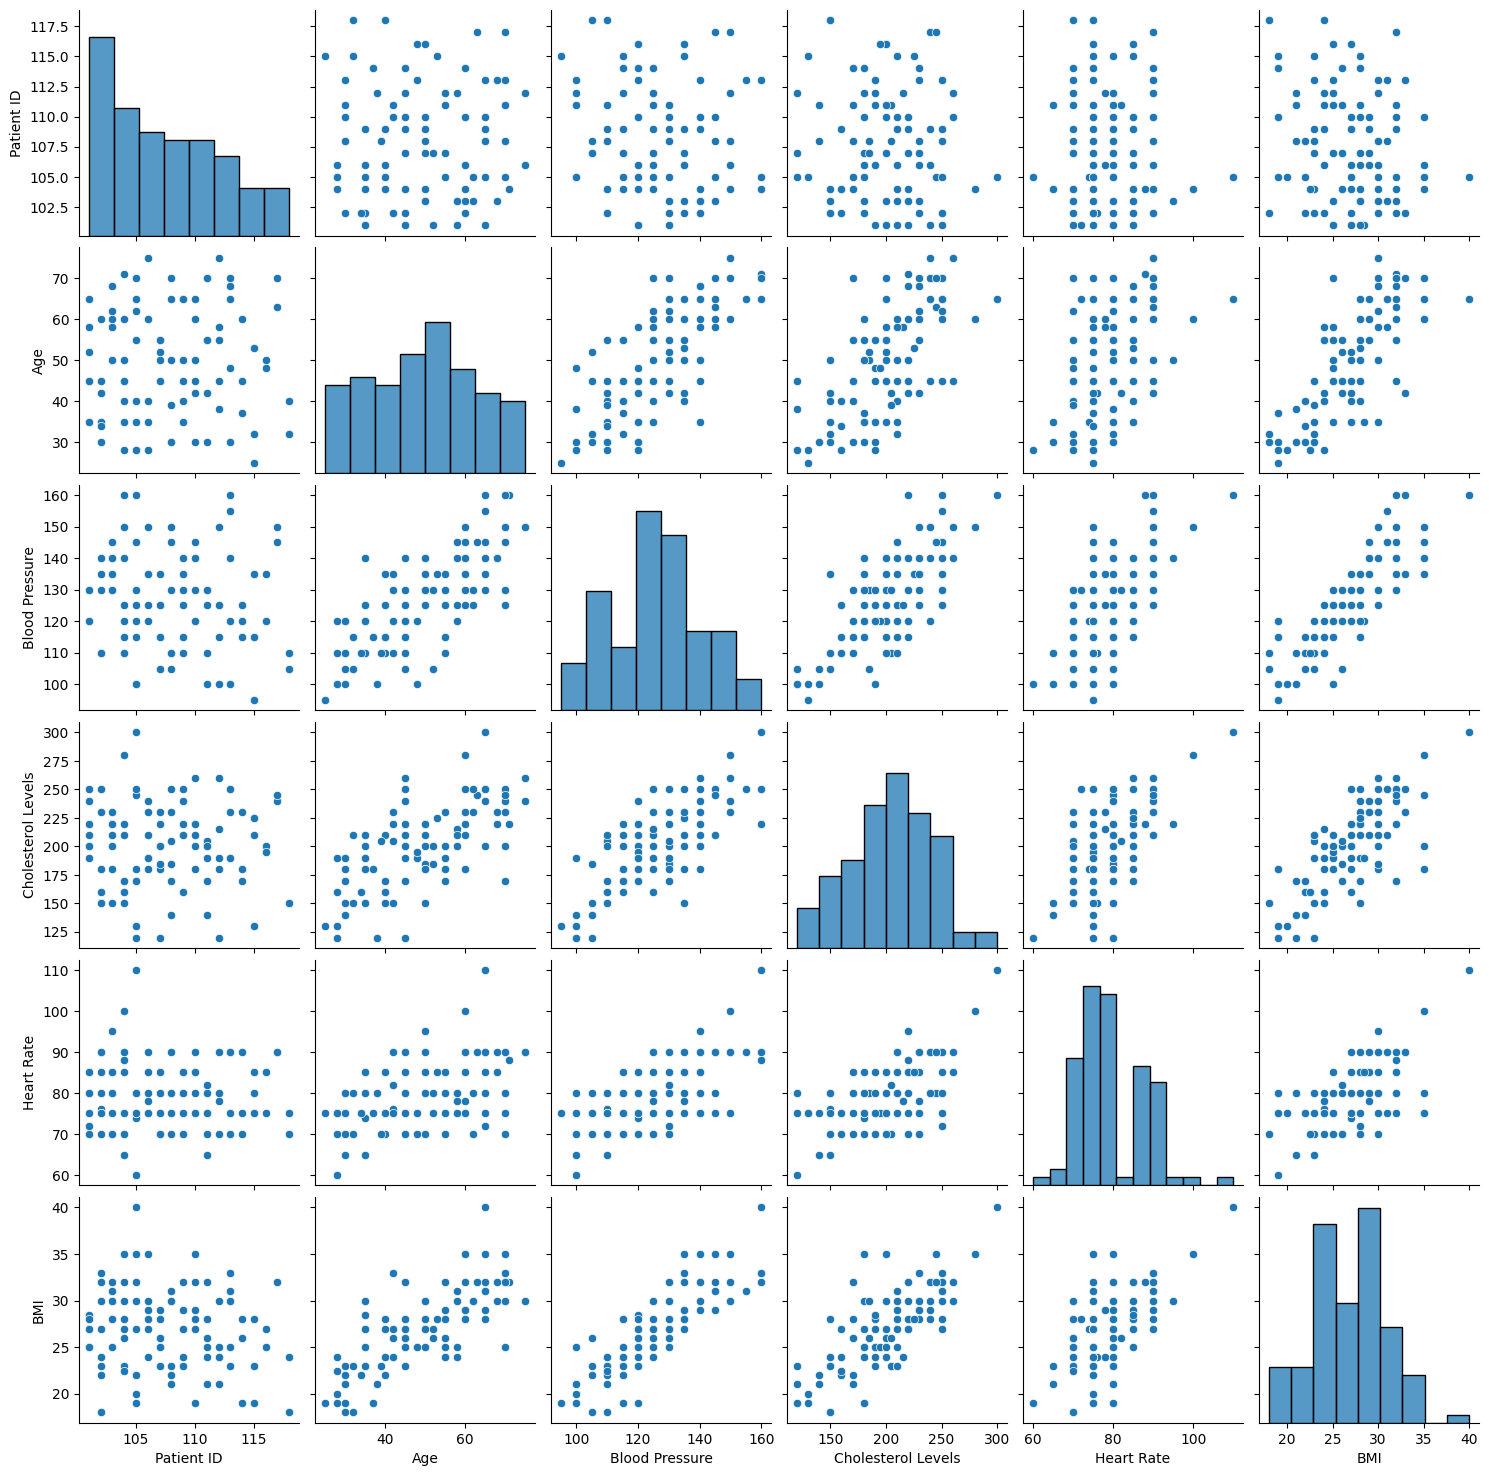

In [20]:
sns.pairplot(data)
plt.show()

In [22]:
meddata = data[['Age', 'Blood Pressure', 'Cholesterol Levels', 'Heart Rate', 'BMI', 'Diagnosis']]

In [23]:
meddata['Diagnosis'] = meddata['Diagnosis'].apply(
    lambda x: 1 if any(condition in x for condition in ['Hypertension', 'Obesity', 'Overweight']) else 0
)

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_12664\2310464088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meddata['Diagnosis'] = meddata['Diagnosis'].apply(


In [24]:
print(meddata['Diagnosis'].value_counts())


Diagnosis
0    63
1    37
Name: count, dtype: int64


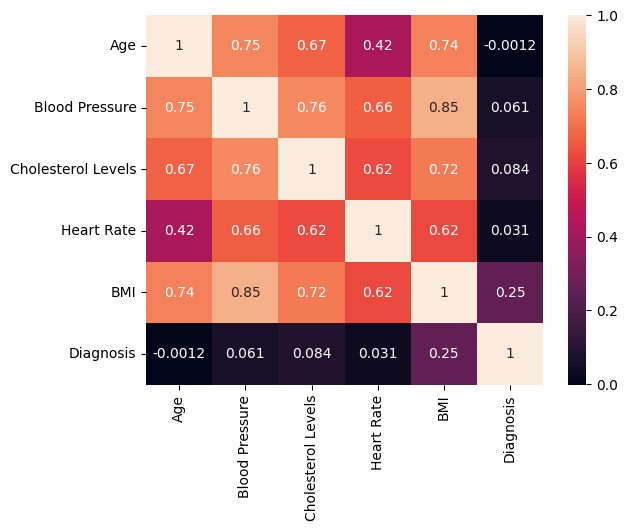

In [25]:
corr = meddata.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [26]:
x = meddata.drop('Diagnosis', axis=1)
y = meddata['Diagnosis']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred = svclassifier.predict(X_test)

In [30]:
print(y_pred)

[0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0]


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12  1]
 [ 3  4]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.80      0.57      0.67         7

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20

